# Linear regression first contact

The purpose of this notebook is to demonstrate in a very simple way how one would use Python to fit a line to data and how one could use that.

## Scenario

You are running an ice cream kiosk in your local park. You are recording the sales your kiosk makes and you are trying to predict the perishble stock you need for a certain day. You can tell intuitively that on a warm day the kiosk is busier that on a cool day so you decide to find out if your intuition is correct. 

You decide to investigate that by adding the temperatures in an array and the sales volume in another array in the same order. You will be using Python as you remembered a guy from Pawsey telling you that it is really easy to do it. 

In [2]:
# Here we enter the centigrade temperatures that we found on BOM http://www.bom.gov.au/ for the last 10 days we had the kiosk open in order

# Centigrade temperatures
temperatures = [ 12.1, 21.5, 14.1, 16.7, 18.9, 24.1, 28.9, 25.6, 21.6, 22.3 ]

# Sale in AUD
sales = [ 120, 240, 151, 158, 181, 240, 266, 251, 231, 239 ]

Let us first have a look at what our data look like using the Python matplotlib library to create a plot of the temperature vs the sales volume.

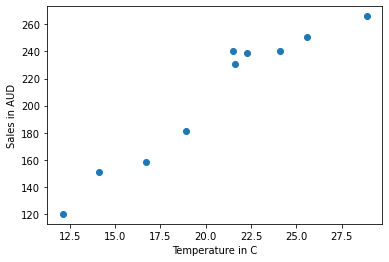

In [7]:
import matplotlib.pyplot as plt

plt.scatter(temperatures, sales)
plt.xlabel('Temperature in C')
plt.ylabel('Sales in AUD')
plt.show()

It looks like the intuition is true. It "should" then be possible to predict how much stock to keep in order to reduce waste but also serve as many customers as possible. 

You remember that guy from Pawsey telling you that you can try "fitting a line" in some circumstances to make predictions, so you decide to give it a go. 

One way to do that is using a library called scipy which has a function called [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) where somebody has already implemented the correct algorithm to do that. 

We will assign the result to a varible called 'lr' and print that (as that is supported by LinregressResult which is what we get back from the function) to inspect its members. 

In [4]:
from scipy import stats

lr = stats.linregress(temperatures, sales)
print(lr)

LinregressResult(slope=9.334034407400711, intercept=15.605571895693345, rvalue=0.9608629551975686, pvalue=9.790078658245796e-06, stderr=0.951438211643042, intercept_stderr=20.135453912363424)


We can see that it contains a few members, including "slope" and "intercept". These correspond to a and b in our line:

$ y = a x + b $

Great, scipy did its magic (in this case [least squares](https://en.wikipedia.org/wiki/Least_squares))! Let us now visualise that result:

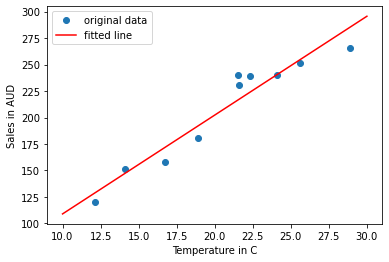

In [8]:
import numpy as np
# Temperature range to show the line
t_range = np.linspace(10, 30)

plt.plot(temperatures, sales, 'o', label='original data')
plt.plot(t_range, lr.intercept + lr.slope*t_range, 'r', label='fitted line')
plt.legend()
plt.xlabel('Temperature in C')
plt.ylabel('Sales in AUD')
plt.show()

Looks good. Now BOM tells us that the temperature tomorrow will be $27.1^{o}C$ can I estimate my sales volume?

Sure I can (but see warnings below) all I have to do is plug in that number to the equation.

In [11]:
given_temperature = 27.1
estimated_sales = given_temperature * lr.slope + lr.intercept
print(f'For a temeprature of {given_temperature} centigrade my sales will be around: {estimated_sales} AUD')

For a temeprature of 27.1 centigrade my sales will be around: 268.55790433625265 AUD


Great we know everything with absolute certainty! We are done! 

Not so fast!

What does that number for estimated sales mean? Can I take it to the bank? 

Actually, it means that given what we have seen before if our assumptions hold (linearity among others that we did not explicitly state) for a very large number of days that the temperature is 27.1 the mean of the sales is going to be that number. 

You may say at this point: "Why do we have to make this hard doc? Can I not just use that number and that technique everywhere?" 

And the answer is absolutely not.

- Why not?

- Because as you can see the values fluctuate above and below are estimate (and the result we have these error members) which will give su a "likely range" for the sales.
- Because we have assumed that there is a linear relationship and did not quantify how well that assumption fits the data. 
- Because we need to consider other factors when applying this estimate. We cannot apply this fit to a temperature of $200^{o}C$ for instance as the sales are almost cetrainly zero at this point as no person or fridge is likely to survive that temperature. 
- Finally, it is important to note that temperature and ice cream sales exhibit a correlation but that does not mean that there is a causal relationship. We could also plot temperature vs murder rate and still see a correlation but that does not mean that one causes the other. 
